In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import string
import io
from pandas.io.json import json_normalize
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Load URL, read CSV, and display as panda frame

In [3]:
moma_artworks_url = "https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv"

artworks = pd.read_csv(moma_artworks_url)

In [4]:
moma_artists_url = "https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artists.csv"

artists = pd.read_csv(moma_artists_url)

# Explore data

In [5]:
#get column, row to understand size of data
artists.shape 

(15668, 9)

In [6]:
artists.columns

Index(['ConstituentID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender',
       'BeginDate', 'EndDate', 'Wiki QID', 'ULAN'],
      dtype='object')

In [7]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15668 entries, 0 to 15667
Data columns (total 9 columns):
ConstituentID    15668 non-null int64
DisplayName      15668 non-null object
ArtistBio        13402 non-null object
Nationality      13146 non-null object
Gender           12476 non-null object
BeginDate        15668 non-null int64
EndDate          15668 non-null int64
Wiki QID         3272 non-null object
ULAN             2939 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


In [8]:
#get column, row to understand size of data
artworks.shape 

(139003, 29)

In [9]:
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [10]:
artworks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139003 entries, 0 to 139002
Data columns (total 29 columns):
Title                 138964 non-null object
Artist                137690 non-null object
ConstituentID         137690 non-null object
ArtistBio             132878 non-null object
Nationality           137690 non-null object
BeginDate             137690 non-null object
EndDate               137690 non-null object
Gender                137690 non-null object
Date                  136773 non-null object
Medium                128408 non-null object
Dimensions            128768 non-null object
CreditLine            136486 non-null object
AccessionNumber       139003 non-null object
Classification        139003 non-null object
Department            139003 non-null object
DateAcquired          131850 non-null object
Cataloged             139003 non-null object
ObjectID              139003 non-null int64
URL                   83113 non-null object
ThumbnailURL          72891 non-null

# Create a master dataset (artists and artworks)

In [11]:
# rearrange artworks with Constituent ID at first
# use Consitituent ID as unique identifier to join two datasets

artworks = artworks[['ConstituentID', 'Title', 'Artist', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)']]

artworks.head()

,ConstituentID,Title,Artist,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,6210,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,7605,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,7056,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,7605,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [12]:
# change ConstituentID to string

artists['ConstituentID'] = artists['ConstituentID'].astype(str)

artists.dtypes

ConstituentID     object
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate          int64
EndDate            int64
Wiki QID          object
ULAN             float64
dtype: object

In [13]:
artworks.dtypes

ConstituentID          object
Title                  object
Artist                 object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ThumbnailURL           object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object

# Join two datasets

In [14]:
# change both column names to be the same
artworks.rename(columns={'ConstituentID':'UniqueID'}, inplace = True)
artists.rename(columns={'ConstituentID':'UniqueID'}, inplace = True)

In [15]:
artworks.head(5)

,UniqueID,Title,Artist,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,6210,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,7605,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,7056,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,7605,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [16]:
artists.head(5)

,UniqueID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [17]:
# join by Unique ID
artists_columns = ['UniqueID', 'DisplayName', 'ArtistBio', 'Nationality', 'Gender', 'BeginDate','EndDate']
master = pd.merge(artworks, artists, on='UniqueID', how='outer')
master.shape

(143085, 37)

In [18]:
# sanity check on the problem of duplicates by creating another master dataframe 
# whereby total count of each UniqueID in artists vs artworks is checked first
# Dedup column is the total count of 
# GroupBy.cumcount(self, ascending: bool = True)
# Number each item in each group from 0 to the length of that group - 1.
artworks['Dedup'] = artworks.groupby('UniqueID').cumcount(ascending=False)
artists['Dedup'] = artists.groupby('UniqueID').cumcount(ascending=False)
draft = pd.merge(artworks, artists, on=['UniqueID', 'Dedup'], how='outer')
draft.shape

(143085, 38)

In [19]:
draft.head(10)

,UniqueID,Title,Artist,ArtistBio_x,Nationality_x,BeginDate_x,EndDate_x,Gender_x,Date,Medium,...,Duration (sec.),Dedup,DisplayName,ArtistBio_y,Nationality_y,Gender_y,BeginDate_y,EndDate_y,Wiki QID,ULAN
0,6210,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7605,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7056,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7605,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,0,Emil Hoppe,"Austrian, 1876–1957",Austrian,Male,1876.0,1957.0,Q1336246,500232997.0
5,7056,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,...,NaN,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7056,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photographs,...,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7056,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,...,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7056,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,...,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7056,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,...,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
master.head(10)

,UniqueID,Title,Artist,ArtistBio_x,Nationality_x,BeginDate_x,EndDate_x,Gender_x,Date,Medium,...,Seat Height (cm),Duration (sec.),DisplayName,ArtistBio_y,Nationality_y,Gender_y,BeginDate_y,EndDate_y,Wiki QID,ULAN
0,6210,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Q84287,500016971.0
1,6210,Armchair,Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1902,Beech wood and aluminum,...,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Q84287,500016971.0
2,6210,Stool,Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1904,"Bent beech wood, molded plywood, and aluminum",...,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Q84287,500016971.0
3,6210,Railing,Otto Wagner,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1899,Painted cast-iron,...,NaN,NaN,Otto Wagner,"Austrian, 1841–1918",Austrian,Male,1841.0,1918.0,Q84287,500016971.0
4,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,NaN,NaN,Christian de Portzamparc,"French, born 1944",French,Male,1944.0,0.0,Q312838,500024982.0
5,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1994-1999,Paper and cardboard,...,NaN,NaN,Christian de Portzamparc,"French, born 1944",French,Male,1944.0,0.0,Q312838,500024982.0
6,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1994–1999,Paper and cardboard,...,NaN,NaN,Christian de Portzamparc,"French, born 1944",French,Male,1944.0,0.0,Q312838,500024982.0
7,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1994–1999,Paper and cardboard,...,NaN,NaN,Christian de Portzamparc,"French, born 1944",French,Male,1944.0,0.0,Q312838,500024982.0
8,7470,"LVMH Tower, New York, NY, Study model",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1994–1999,Paper and cardboard,...,NaN,NaN,Christian de Portzamparc,"French, born 1944",French,Male,1944.0,0.0,Q312838,500024982.0
9,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,"(French, born 1944)",(French),(1944),(0),(Male),1994–1999,Paper and cardboard,...,NaN,NaN,Christian de Portzamparc,"French, born 1944",French,Male,1944.0,0.0,Q312838,500024982.0


In [21]:
# rearrange columns of master

master.columns

master = master[['UniqueID', 'Title', 'Artist', 'ArtistBio_x', 'ArtistBio_y', 'Gender_x', 'Gender_y', 'Nationality_x', 'Nationality_y', 'BeginDate_x',
       'EndDate_x', 'BeginDate_y', 'EndDate_y', 'DisplayName', 'Date', 'Medium', 'Dimensions', 'CreditLine',
       'AccessionNumber', 'Classification', 'Department', 'DateAcquired',
       'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL', 'Circumference (cm)',
       'Depth (cm)', 'Diameter (cm)', 'Height (cm)', 'Length (cm)',
       'Weight (kg)', 'Width (cm)', 'Seat Height (cm)', 'Duration (sec.)',
       'Wiki QID', 'ULAN']]

master.head(10)

,UniqueID,Title,Artist,ArtistBio_x,ArtistBio_y,Gender_x,Gender_y,Nationality_x,Nationality_y,BeginDate_x,...,Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Wiki QID,ULAN
0,6210,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,"(Austrian, 1841–1918)","Austrian, 1841–1918",(Male),Male,(Austrian),Austrian,(1841),...,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,Q84287,500016971.0
1,6210,Armchair,Otto Wagner,"(Austrian, 1841–1918)","Austrian, 1841–1918",(Male),Male,(Austrian),Austrian,(1841),...,51.5000,NaN,78.5000,NaN,NaN,56.5000,NaN,NaN,Q84287,500016971.0
2,6210,Stool,Otto Wagner,"(Austrian, 1841–1918)","Austrian, 1841–1918",(Male),Male,(Austrian),Austrian,(1841),...,40.6401,NaN,46.9901,NaN,NaN,40.6401,NaN,NaN,Q84287,500016971.0
3,6210,Railing,Otto Wagner,"(Austrian, 1841–1918)","Austrian, 1841–1918",(Male),Male,(Austrian),Austrian,(1841),...,7.6000,NaN,72.4000,NaN,NaN,117.5000,NaN,NaN,Q84287,500016971.0
4,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)","French, born 1944",(Male),Male,(French),French,(1944),...,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,Q312838,500024982.0
5,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,"(French, born 1944)","French, born 1944",(Male),Male,(French),French,(1944),...,30.0000,NaN,100.0000,NaN,NaN,19.0000,NaN,NaN,Q312838,500024982.0
6,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,"(French, born 1944)","French, born 1944",(Male),Male,(French),French,(1944),...,30.0000,NaN,100.0000,NaN,NaN,19.0000,NaN,NaN,Q312838,500024982.0
7,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,"(French, born 1944)","French, born 1944",(Male),Male,(French),French,(1944),...,30.0000,NaN,100.0000,NaN,NaN,19.0000,NaN,NaN,Q312838,500024982.0
8,7470,"LVMH Tower, New York, NY, Study model",Christian de Portzamparc,"(French, born 1944)","French, born 1944",(Male),Male,(French),French,(1944),...,30.0000,NaN,100.0000,NaN,NaN,19.0000,NaN,NaN,Q312838,500024982.0
9,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,"(French, born 1944)","French, born 1944",(Male),Male,(French),French,(1944),...,30.0000,NaN,100.0000,NaN,NaN,19.0000,NaN,NaN,Q312838,500024982.0


# Data Cleaning: drop nulls, deduplication, data types, unique counts, and classification

## Make a copy of master and remove duplicated columns 

In [22]:
# make copy

master_copy = master
master_copy.head(5)

,UniqueID,Title,Artist,ArtistBio_x,ArtistBio_y,Gender_x,Gender_y,Nationality_x,Nationality_y,BeginDate_x,...,Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),Wiki QID,ULAN
0,6210,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,"(Austrian, 1841–1918)","Austrian, 1841–1918",(Male),Male,(Austrian),Austrian,(1841),...,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN,Q84287,500016971.0
1,6210,Armchair,Otto Wagner,"(Austrian, 1841–1918)","Austrian, 1841–1918",(Male),Male,(Austrian),Austrian,(1841),...,51.5000,NaN,78.5000,NaN,NaN,56.5000,NaN,NaN,Q84287,500016971.0
2,6210,Stool,Otto Wagner,"(Austrian, 1841–1918)","Austrian, 1841–1918",(Male),Male,(Austrian),Austrian,(1841),...,40.6401,NaN,46.9901,NaN,NaN,40.6401,NaN,NaN,Q84287,500016971.0
3,6210,Railing,Otto Wagner,"(Austrian, 1841–1918)","Austrian, 1841–1918",(Male),Male,(Austrian),Austrian,(1841),...,7.6000,NaN,72.4000,NaN,NaN,117.5000,NaN,NaN,Q84287,500016971.0
4,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)","French, born 1944",(Male),Male,(French),French,(1944),...,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN,Q312838,500024982.0


In [23]:
# remove duplicated columns "_x" and keep "_y"
master_copy = master_copy.drop(['ArtistBio_x', 'ArtistBio_y', 'Gender_x', 'Nationality_x', 'BeginDate_x', 'EndDate_x', 'DisplayName'], axis=1)

In [24]:
# rename columns for readability

master_copy.rename(columns={'Nationality_y':'Nationality', 'Gender_y':'Gender',
                        'BeginDate_y': 'Birth', 'EndDate_y': 'Death'}, inplace = True)

# Time

In [25]:
# time function - to standardize date, begin/end date, acquisition date

#https://www.dataquest.io/blog/data-cleaning-with-python/
    
# Pattern 1: “1976-77” (year ranges)
# Pattern 2: “c. 1917”
# Pattern 3: “Unknown”
# Pattern 4: “n.d.”

master_copy['Date'].value_counts(dropna=False).head(1000)

NaN                     6312
1967                    1855
1971                    1830
1966                    1661
1968                    1615
1965                    1587
1969                    1503
1973                    1480
1964                    1407
1970                    1403
1962                    1349
2003                    1265
1963                    1260
1991                    1225
1972                    1154
1930                    1130
1928                    1118
1980                    1098
1976                    1079
1931                    1067
2001                    1060
1961                     992
1990                     976
1974                     959
1977                     954
1984                     954
2002                     952
1983                     901
1960                     883
1994                     875
                        ... 
(c. 1913)                 10
1996-2004                 10
1927-28                   10
1968-69       

In [26]:
def strip_punctuation(row):
    # turn each start date into string 
    start_date = str(row['Date'])
    # remove any whitespace outside of the start up
    start_date = start_date.strip()
    # replace inside whitespace with punctuation
    start_date = start_date.replace(" ", "?")
    # separate start date into 2 elemtns if "-" is found
    final_date = start_date.translate(str.maketrans({a: None for a in string.punctuation}))
    return final_date

# assign the results of " strip_punctuation" to the 'Date' column
# for Pandas to go row-wise so we set "axis = 1"
# for Pandas to go column-wise so we set "axis = 0"

master_copy['Date'] = master_copy.apply(lambda row: strip_punctuation(row), axis=1)
master_copy['Date'].value_counts()

nan                                   6312
1967                                  1950
1966                                  1883
1971                                  1861
1968                                  1735
1965                                  1675
1969                                  1580
1973                                  1563
1964                                  1457
1970                                  1442
2003                                  1431
1962                                  1392
1963                                  1308
1991                                  1252
1972                                  1228
1930                                  1136
1928                                  1135
1980                                  1128
2001                                  1114
1976                                  1111
2002                                  1083
1931                                  1076
1961                                  1056
1974       

In [27]:
# for some reason the above function does not remove '-'

def split_dates(row):
    # start date contains the current value for the Date column
    start_date = str(row['Date'])
    # split start_date into two elements if "-" is found 
    # remove - again
    split_date = start_date.split('-')
    # if a "-" is found, split_date will contain a list with at least two items
    # else not found, split_date will have 1 item, the initial_date
    # use final_date from previous function's list
    if len(split_date) >1:
        final_date = split_date[0]
    else:
        final_date = start_date
    return final_date

master_copy['Date'] = master_copy.apply(lambda row: split_dates(row), axis=1)
master_copy['Date'].value_counts()

nan                                   6312
1967                                  1950
1966                                  1883
1971                                  1861
1968                                  1735
1965                                  1675
1969                                  1580
1973                                  1563
1964                                  1457
1970                                  1442
2003                                  1431
1962                                  1392
1963                                  1308
1991                                  1252
1972                                  1228
1930                                  1136
1928                                  1135
1980                                  1128
2001                                  1114
1976                                  1111
2002                                  1083
1931                                  1076
1961                                  1056
1974       

In [28]:
# delete rows with letters

master_copy = master_copy[~master_copy['Date'].str.contains("[a-zA-Z]").fillna(False)]

In [29]:
master_copy['Date'].value_counts()

1967         1950
1966         1883
1971         1861
1968         1735
1965         1675
1969         1580
1973         1563
1964         1457
1970         1442
2003         1431
1962         1392
1963         1308
1991         1252
1972         1228
1930         1136
1928         1135
1980         1128
2001         1114
1976         1111
2002         1083
1931         1076
1961         1056
1974         1042
1990         1003
1977          989
1984          972
2004          955
1960          934
1983          922
1978          901
             ... 
184952          1
19682004        1
19861987        1
18881964        1
1982–84         1
1961–65         1
193349          1
20052007        1
1947–49         1
1954–1956       1
19831984        1
1945–51         1
194547          1
19772001        1
19751979        1
1961–2010       1
1988–1995       1
20072015        1
19501965        1
192730          1
19661978        1
1932–34         1
187980          1
1811            1
1920–29   

In [30]:
master_copy['Date'].dtypes

dtype('O')

In [31]:
# drop dates with len() < 4 or > 4
# year is 4 digit

def drop_dates(row):
    # start date contains the current value for the Date column
    start_date = row['Date']
    
    # if larger than 4 digits, then drop above four digits
    # if less than 4 digits, then keep the 4 digit format
    # anything else, keep the same 4 digit format
    
    if len(start_date) > 4:
        final_date = np.NaN
    elif len(start_date) < 4:
        final_date = np.NaN
    else:
        final_date = start_date
    
    return final_date

In [32]:
# assign the results of " drop_dates" to the 'Date' column
# for Pandas to go row-wise so we set "axis = 1"
# for Pandas to go column-wise so we set "axis = 0"
master_copy['Date'] = master_copy.apply(lambda row: drop_dates(row), axis=1)
master_copy['Date'].value_counts()

1967    1950
1966    1883
1971    1861
1968    1735
1965    1675
1969    1580
1973    1563
1964    1457
1970    1442
2003    1431
1962    1392
1963    1308
1991    1252
1972    1228
1930    1136
1928    1135
1980    1128
2001    1114
1976    1111
2002    1083
1931    1076
1961    1056
1974    1042
1990    1003
1977     989
1984     972
2004     955
1960     934
1983     922
1978     901
        ... 
1879      14
1885      14
1855      12
1864      11
1851      11
1880      11
1861      11
1883       9
1840       9
1837       7
1863       7
1844       6
1870       6
1882       6
1768       5
1862       5
1850       5
1878       5
1884       5
1849       4
1843       3
1847       2
1832       2
1841       2
1845       2
1811       1
1809       1
1842       1
1848       1
1805       1
Name: Date, Length: 186, dtype: int64

In [33]:
# delete those two rows where the 'Date' is an error = 4271
master_copy = master_copy[master_copy.Date != '4271']

In [34]:
master_copy['Date'].sort_values()

9707      1768
9710      1768
9711      1768
9709      1768
9708      1768
101410    1805
101924    1809
69875     1811
64060     1818
63955     1818
63954     1818
63953     1818
63952     1818
63951     1818
63950     1818
63948     1818
63956     1818
63947     1818
63946     1818
63945     1818
63944     1818
64067     1818
64068     1818
63949     1818
63943     1818
63957     1818
63959     1818
63976     1818
63975     1818
63974     1818
          ... 
138633     NaN
138634     NaN
138635     NaN
138636     NaN
138650     NaN
138651     NaN
138683     NaN
138713     NaN
138739     NaN
138740     NaN
138741     NaN
138742     NaN
138743     NaN
138744     NaN
138745     NaN
138746     NaN
138747     NaN
138748     NaN
138749     NaN
138750     NaN
138751     NaN
138752     NaN
138761     NaN
138911     NaN
138914     NaN
138965     NaN
138966     NaN
138967     NaN
138984     NaN
138989     NaN
Name: Date, Length: 112980, dtype: object

In [35]:
master_copy['Date'].dropna()

0         1896
1         1902
2         1904
3         1899
4         1987
25        1903
26        1903
27        1980
53        1980
54        1978
55        1980
56        1979
57        1979
58        1979
59        1980
60        1979
61        1979
62        1979
63        1979
64        1979
65        1979
66        1980
82        1984
83        1986
84        1983
85        1992
86        1986
88        1968
89        1957
91        1962
          ... 
138962    2018
138963    2014
138964    2011
138968    2018
138969    2018
138970    2014
138974    2019
138976    2007
138977    1968
138978    1946
138979    1958
138980    2015
138981    1900
138982    1995
138985    2019
138986    2019
138987    1957
138988    2018
138990    1924
138991    1968
138992    1937
138993    1937
138994    1938
138995    1939
138996    1939
138997    2019
138998    2018
138999    2019
139000    2019
139001    2018
Name: Date, Length: 93503, dtype: object

In [36]:
# convert back to float
master_copy['Date'] = master_copy['Date'].astype(float)
master_copy['Date'].dtype

dtype('float64')

In [37]:
master_copy['DateAcquired'].value_counts(dropna=False).head(20)
    
# convert to pandas

1964-10-06    9717
NaN           5203
1968-03-06    4534
2008-10-08    3115
2005-05-10    2546
2001-01-24    1822
1940-04-05    1140
1949-09-29     905
1965-11-09     847
2000-10-12     847
2013-10-24     826
1974-01-10     826
2018-11-05     787
2015-10-27     688
2012-10-03     685
2019-04-04     636
2008-06-18     635
2015-05-28     608
2014-10-06     604
1967-10-18     560
Name: DateAcquired, dtype: int64

In [38]:
master_copy['DateAcquired'] = master_copy['DateAcquired'].astype(str)

In [39]:
master_copy['DateAcquired'] = pd.to_datetime(master_copy['DateAcquired'], infer_datetime_format=True, errors = 'coerce')

In [40]:
master_copy['DateAcquired_Year'] = master_copy['DateAcquired'].dt.year

In [41]:
master_copy['DateAcquired_Month'] = master_copy['DateAcquired'].dt.month

In [42]:
master_copy.dtypes

UniqueID                      object
Title                         object
Artist                        object
Gender                        object
Nationality                   object
Birth                        float64
Death                        float64
Date                         float64
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired          datetime64[ns]
Cataloged                     object
ObjectID                     float64
URL                           object
ThumbnailURL                  object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
Width (cm)                   float64
Seat Height (cm)             float64
D

In [43]:
master_copy['DateAcquired_Year'].sort_values()

33878     1929.0
28558     1929.0
17197     1929.0
17196     1929.0
31349     1929.0
33900     1929.0
105361    1929.0
34594     1929.0
62583     1930.0
73796     1930.0
109027    1930.0
70944     1930.0
62582     1930.0
63174     1931.0
72606     1931.0
105203    1931.0
31354     1932.0
31355     1932.0
5222      1932.0
31352     1932.0
31356     1932.0
31350     1932.0
70878     1932.0
431       1932.0
70879     1932.0
69316     1932.0
106739    1932.0
31304     1932.0
31303     1932.0
31302     1932.0
           ...  
137116       NaN
137117       NaN
137118       NaN
137119       NaN
137120       NaN
137121       NaN
137122       NaN
137123       NaN
137124       NaN
137125       NaN
137126       NaN
137127       NaN
137128       NaN
137178       NaN
137197       NaN
137785       NaN
137845       NaN
137846       NaN
137946       NaN
137954       NaN
137955       NaN
137956       NaN
137957       NaN
137958       NaN
137960       NaN
137962       NaN
137963       NaN
138718       N

In [44]:
master_copy['Date'] = master_copy['Date'].astype(float)

# Birth

In [45]:
master_copy['Birth'].value_counts(ascending=False)

0.0       4673
1857.0    4573
1911.0    3678
1886.0    2730
1934.0    2131
1928.0    2022
1901.0    1912
1941.0    1887
1923.0    1841
1887.0    1791
1867.0    1775
1938.0    1612
1930.0    1460
1943.0    1459
1935.0    1436
1885.0    1390
1940.0    1365
1937.0    1298
1927.0    1249
1933.0    1246
1881.0    1163
1947.0    1148
1924.0    1141
1955.0    1130
1931.0    1107
1939.0    1098
1898.0    1077
1936.0    1073
1944.0    1057
1926.0    1050
          ... 
1847.0       4
1812.0       4
1842.0       4
1804.0       4
1799.0       3
2003.0       3
2004.0       3
1800.0       3
1846.0       3
2010.0       3
1808.0       3
1998.0       2
1817.0       2
1809.0       2
1795.0       1
1810.0       1
1731.0       1
1835.0       1
1838.0       1
1850.0       1
1787.0       1
1782.0       1
1765.0       1
2012.0       1
2007.0       1
2000.0       1
1996.0       1
1994.0       1
1993.0       1
1789.0       1
Name: Birth, Length: 215, dtype: int64

In [46]:
master_copy['Birth'].value_counts(dropna=False).head(1000)

NaN        6918
 0.0       4673
 1857.0    4573
 1911.0    3678
 1886.0    2730
 1934.0    2131
 1928.0    2022
 1901.0    1912
 1941.0    1887
 1923.0    1841
 1887.0    1791
 1867.0    1775
 1938.0    1612
 1930.0    1460
 1943.0    1459
 1935.0    1436
 1885.0    1390
 1940.0    1365
 1937.0    1298
 1927.0    1249
 1933.0    1246
 1881.0    1163
 1947.0    1148
 1924.0    1141
 1955.0    1130
 1931.0    1107
 1939.0    1098
 1898.0    1077
 1936.0    1073
 1944.0    1057
           ... 
 1804.0       4
 1842.0       4
 1812.0       4
 1847.0       4
 1799.0       3
 2010.0       3
 1808.0       3
 2004.0       3
 1800.0       3
 1846.0       3
 2003.0       3
 1809.0       2
 1817.0       2
 1998.0       2
 1795.0       1
 1782.0       1
 1810.0       1
 1838.0       1
 1731.0       1
 1787.0       1
 1835.0       1
 1850.0       1
 1765.0       1
 1993.0       1
 1994.0       1
 1996.0       1
 2012.0       1
 2007.0       1
 2000.0       1
 1789.0       1
Name: Birth, Length: 216

In [47]:
master_copy['Birth'] = master_copy['Birth'].astype(str)
master_copy = master_copy[~master_copy['Birth'].str.contains("[a-zA-Z]").fillna(False)]

In [48]:
master_copy['Birth'].value_counts(ascending=False)

0.0       4673
1857.0    4573
1911.0    3678
1886.0    2730
1934.0    2131
1928.0    2022
1901.0    1912
1941.0    1887
1923.0    1841
1887.0    1791
1867.0    1775
1938.0    1612
1930.0    1460
1943.0    1459
1935.0    1436
1885.0    1390
1940.0    1365
1937.0    1298
1927.0    1249
1933.0    1246
1881.0    1163
1947.0    1148
1924.0    1141
1955.0    1130
1931.0    1107
1939.0    1098
1898.0    1077
1936.0    1073
1944.0    1057
1926.0    1050
          ... 
1842.0       4
1812.0       4
1804.0       4
1847.0       4
2003.0       3
1800.0       3
1846.0       3
2004.0       3
1808.0       3
1799.0       3
2010.0       3
1809.0       2
1998.0       2
1817.0       2
1835.0       1
1996.0       1
1765.0       1
2000.0       1
1838.0       1
2012.0       1
1787.0       1
1795.0       1
2007.0       1
1850.0       1
1782.0       1
1789.0       1
1994.0       1
1810.0       1
1993.0       1
1731.0       1
Name: Birth, Length: 215, dtype: int64

In [49]:
master_copy['Birth'].dropna()

0         1841.0
1         1841.0
2         1841.0
3         1841.0
4         1944.0
5         1944.0
6         1944.0
7         1944.0
8         1944.0
9         1944.0
10        1944.0
11        1944.0
12        1944.0
13        1944.0
14        1944.0
15        1944.0
16        1944.0
17        1944.0
18        1944.0
19        1944.0
20        1944.0
21        1944.0
22        1944.0
23        1944.0
24        1944.0
25        1876.0
26        1876.0
27        1944.0
28        1944.0
29        1944.0
           ...  
138957    1985.0
138958    1985.0
138959    1985.0
138960    1985.0
138961    1985.0
138962    1985.0
138963    1971.0
138964    1986.0
138965    1983.0
138966    1983.0
138967    1983.0
138970    1978.0
138976    1986.0
138977    1946.0
138978    1905.0
138979    1905.0
138980    1986.0
138981    1869.0
138982    1948.0
138985    1976.0
138986    1976.0
138987    1925.0
138988    1941.0
138989    1941.0
138990    1899.0
138991    1945.0
138998    1976.0
138999    1983

In [50]:
master_copy['Birth'].value_counts(ascending=False)

0.0       4673
1857.0    4573
1911.0    3678
1886.0    2730
1934.0    2131
1928.0    2022
1901.0    1912
1941.0    1887
1923.0    1841
1887.0    1791
1867.0    1775
1938.0    1612
1930.0    1460
1943.0    1459
1935.0    1436
1885.0    1390
1940.0    1365
1937.0    1298
1927.0    1249
1933.0    1246
1881.0    1163
1947.0    1148
1924.0    1141
1955.0    1130
1931.0    1107
1939.0    1098
1898.0    1077
1936.0    1073
1944.0    1057
1926.0    1050
          ... 
1842.0       4
1812.0       4
1804.0       4
1847.0       4
2003.0       3
1800.0       3
1846.0       3
2004.0       3
1808.0       3
1799.0       3
2010.0       3
1809.0       2
1998.0       2
1817.0       2
1835.0       1
1996.0       1
1765.0       1
2000.0       1
1838.0       1
2012.0       1
1787.0       1
1795.0       1
2007.0       1
1850.0       1
1782.0       1
1789.0       1
1994.0       1
1810.0       1
1993.0       1
1731.0       1
Name: Birth, Length: 215, dtype: int64

In [51]:
# convert back to float
master_copy['Birth'] = master_copy['Birth'].astype(float)
master_copy['Birth'].dtype

dtype('float64')

# Death

In [52]:
master_copy['Death'].value_counts(ascending=False)

0.0       39828
1927.0     4623
2010.0     3685
1985.0     3102
1969.0     2508
1954.0     1930
1947.0     1683
1976.0     1628
2007.0     1139
1973.0     1110
2014.0     1081
1959.0     1002
1984.0     1002
2013.0      972
1997.0      959
1941.0      941
1944.0      921
1965.0      902
1994.0      874
2012.0      872
1958.0      866
1998.0      828
1987.0      817
1964.0      793
2002.0      782
1953.0      774
2008.0      731
1956.0      715
1983.0      674
1999.0      654
          ...  
1885.0       13
1878.0       12
1922.0       10
1915.0        8
1871.0        7
1877.0        7
1872.0        5
1868.0        5
1866.0        5
1795.0        5
1895.0        5
1891.0        5
1886.0        4
1876.0        3
1873.0        3
1912.0        3
1875.0        3
1892.0        2
1874.0        2
1908.0        2
1858.0        2
1893.0        1
1851.0        1
1852.0        1
1890.0        1
1859.0        1
1888.0        1
1881.0        1
1905.0        1
1899.0        1
Name: Death, Length: 162

In [53]:
master_copy['Death'].value_counts(dropna=False).head(1000)

0.0       39828
1927.0     4623
2010.0     3685
1985.0     3102
1969.0     2508
1954.0     1930
1947.0     1683
1976.0     1628
2007.0     1139
1973.0     1110
2014.0     1081
1959.0     1002
1984.0     1002
2013.0      972
1997.0      959
1941.0      941
1944.0      921
1965.0      902
1994.0      874
2012.0      872
1958.0      866
1998.0      828
1987.0      817
1964.0      793
2002.0      782
1953.0      774
2008.0      731
1956.0      715
1983.0      674
1999.0      654
          ...  
1885.0       13
1878.0       12
1922.0       10
1915.0        8
1871.0        7
1877.0        7
1872.0        5
1868.0        5
1866.0        5
1795.0        5
1895.0        5
1891.0        5
1886.0        4
1876.0        3
1873.0        3
1912.0        3
1875.0        3
1892.0        2
1874.0        2
1908.0        2
1858.0        2
1893.0        1
1851.0        1
1852.0        1
1890.0        1
1859.0        1
1888.0        1
1881.0        1
1905.0        1
1899.0        1
Name: Death, Length: 162

In [54]:
master_copy['Death'] = master_copy['Death'].astype(str)
master_copy = master_copy[~master_copy['Death'].str.contains("[a-zA-Z]").fillna(False)]

In [55]:
master_copy['Death'].value_counts(ascending=False)

0.0       39828
1927.0     4623
2010.0     3685
1985.0     3102
1969.0     2508
1954.0     1930
1947.0     1683
1976.0     1628
2007.0     1139
1973.0     1110
2014.0     1081
1959.0     1002
1984.0     1002
2013.0      972
1997.0      959
1941.0      941
1944.0      921
1965.0      902
1994.0      874
2012.0      872
1958.0      866
1998.0      828
1987.0      817
1964.0      793
2002.0      782
1953.0      774
2008.0      731
1956.0      715
1983.0      674
1999.0      654
          ...  
1885.0       13
1878.0       12
1922.0       10
1915.0        8
1871.0        7
1877.0        7
1795.0        5
1872.0        5
1895.0        5
1891.0        5
1868.0        5
1866.0        5
1886.0        4
1912.0        3
1876.0        3
1873.0        3
1875.0        3
1908.0        2
1892.0        2
1874.0        2
1858.0        2
1881.0        1
1890.0        1
1851.0        1
1899.0        1
1852.0        1
1888.0        1
1893.0        1
1905.0        1
1859.0        1
Name: Death, Length: 162

In [56]:
master_copy['Death'].dropna()

0         1918.0
1         1918.0
2         1918.0
3         1918.0
4            0.0
5            0.0
6            0.0
7            0.0
8            0.0
9            0.0
10           0.0
11           0.0
12           0.0
13           0.0
14           0.0
15           0.0
16           0.0
17           0.0
18           0.0
19           0.0
20           0.0
21           0.0
22           0.0
23           0.0
24           0.0
25        1957.0
26        1957.0
27           0.0
28           0.0
29           0.0
           ...  
138957       0.0
138958       0.0
138959       0.0
138960       0.0
138961       0.0
138962       0.0
138963       0.0
138964       0.0
138965       0.0
138966       0.0
138967       0.0
138970       0.0
138976       0.0
138977       0.0
138978    1990.0
138979    1990.0
138980       0.0
138981    1962.0
138982       0.0
138985       0.0
138986       0.0
138987    2019.0
138988       0.0
138989       0.0
138990    1963.0
138991       0.0
138998       0.0
138999       0

In [57]:
# convert back to float
master_copy['Death'] = master_copy['Death'].astype(float)
master_copy['Death'].dtype

dtype('float64')

In [58]:
master_copy['Death'].value_counts(ascending=False)

0.0       39828
1927.0     4623
2010.0     3685
1985.0     3102
1969.0     2508
1954.0     1930
1947.0     1683
1976.0     1628
2007.0     1139
1973.0     1110
2014.0     1081
1959.0     1002
1984.0     1002
2013.0      972
1997.0      959
1941.0      941
1944.0      921
1965.0      902
1994.0      874
2012.0      872
1958.0      866
1998.0      828
1987.0      817
1964.0      793
2002.0      782
1953.0      774
2008.0      731
1956.0      715
1983.0      674
1999.0      654
          ...  
1885.0       13
1878.0       12
1922.0       10
1915.0        8
1871.0        7
1877.0        7
1872.0        5
1868.0        5
1866.0        5
1795.0        5
1895.0        5
1891.0        5
1886.0        4
1876.0        3
1873.0        3
1912.0        3
1875.0        3
1892.0        2
1874.0        2
1908.0        2
1858.0        2
1893.0        1
1851.0        1
1852.0        1
1890.0        1
1859.0        1
1888.0        1
1881.0        1
1905.0        1
1899.0        1
Name: Death, Length: 162

In [59]:
master_copy['Date'].value_counts(ascending=False)

1967.0    1798
1966.0    1695
1965.0    1588
1968.0    1491
1973.0    1477
1969.0    1435
1970.0    1372
2003.0    1360
1964.0    1334
1962.0    1245
1971.0    1245
1963.0    1235
1991.0    1190
1972.0    1153
1930.0    1110
1928.0    1096
1980.0    1074
1931.0    1056
2001.0    1054
1976.0    1053
2002.0    1046
1961.0    1016
1974.0     954
1990.0     940
1977.0     911
2004.0     899
1984.0     892
1960.0     888
1994.0     860
1999.0     858
          ... 
1886.0      15
1879.0      14
1885.0      14
1855.0      12
1864.0      11
1880.0      11
1851.0      10
1861.0       9
1883.0       9
1837.0       7
1863.0       6
1870.0       6
1850.0       5
1844.0       5
1768.0       5
1862.0       5
1878.0       5
1882.0       5
1884.0       5
1849.0       4
1841.0       2
1840.0       2
1832.0       2
1848.0       1
1847.0       1
1845.0       1
1842.0       1
1811.0       1
1809.0       1
1805.0       1
Name: Date, Length: 185, dtype: int64

# Age

In [60]:
master_copy['AcquiredAge_Artwork'] = master_copy['DateAcquired_Year'] - master_copy['Date']

In [61]:
master_copy['AcquiredAge_Artwork'] = master_copy['AcquiredAge_Artwork'].astype(str)
master_copy = master_copy[~master_copy['AcquiredAge_Artwork'].str.contains("-").fillna(False)]

In [62]:
master_copy['AcquiredAge_Artwork'] = master_copy['AcquiredAge_Artwork'].astype(float)
master_copy['AcquiredAge_Artwork'].value_counts(dropna=False).head(1000)

NaN       22319
 1.0      10880
 0.0       5420
 2.0       5395
 3.0       3589
 4.0       2553
 5.0       2351
 6.0       2090
 7.0       1882
 8.0       1608
 9.0       1442
 10.0      1301
 34.0      1239
 12.0      1147
 11.0      1144
 20.0      1067
 15.0      1057
 43.0      1032
 36.0      1017
 44.0       968
 41.0       950
 14.0       908
 21.0       897
 13.0       885
 40.0       866
 42.0       864
 28.0       862
 45.0       848
 29.0       834
 16.0       827
          ...  
 109.0        6
 161.0        6
 157.0        6
 135.0        6
 142.0        6
 145.0        5
 141.0        5
 186.0        5
 143.0        4
 140.0        4
 156.0        4
 116.0        4
 118.0        3
 154.0        3
 149.0        2
 137.0        2
 139.0        2
 151.0        2
 147.0        2
 138.0        2
 163.0        1
 120.0        1
 175.0        1
 173.0        1
 166.0        1
 148.0        1
 153.0        1
 133.0        1
 152.0        1
 177.0        1
Name: AcquiredAge_Artwor

In [63]:
master_copy['AcquiredAge_Artwork'].describe()

count    83671.000000
mean        24.491915
std         27.355292
min          0.000000
25%          2.000000
50%         14.000000
75%         40.000000
max        186.000000
Name: AcquiredAge_Artwork, dtype: float64

In [64]:
def drop_acquired_values(row):
    # start date contains the current value for the Date column
    start_value = row['AcquiredAge_Artwork']
    
    # if larger than 4 digits, then drop above four digits
    # if less than 4 digits, then keep the 4 digit format
    # anything else, keep the same 4 digit format
    
    if start_value >= 205:
        final_value = np.NaN
    elif start_value <= -205:
        final_value = np.NaN
    else:
        final_value = start_value
    
    return final_value

In [65]:
master_copy['AcquiredAge_Artwork_2'] = master_copy.apply(lambda row: drop_acquired_values(row), axis=1)
master_copy['AcquiredAge_Artwork_2'].value_counts()

1.0      10880
0.0       5420
2.0       5395
3.0       3589
4.0       2553
5.0       2351
6.0       2090
7.0       1882
8.0       1608
9.0       1442
10.0      1301
34.0      1239
12.0      1147
11.0      1144
20.0      1067
15.0      1057
43.0      1032
36.0      1017
44.0       968
41.0       950
14.0       908
21.0       897
13.0       885
40.0       866
42.0       864
28.0       862
45.0       848
29.0       834
16.0       827
17.0       807
         ...  
109.0        6
135.0        6
161.0        6
157.0        6
142.0        6
145.0        5
186.0        5
141.0        5
143.0        4
140.0        4
156.0        4
116.0        4
154.0        3
118.0        3
139.0        2
138.0        2
151.0        2
149.0        2
137.0        2
147.0        2
163.0        1
166.0        1
173.0        1
148.0        1
153.0        1
133.0        1
120.0        1
152.0        1
177.0        1
175.0        1
Name: AcquiredAge_Artwork_2, Length: 164, dtype: int64

In [66]:
master_copy['AcquiredAge_Artwork_2'].describe()

count    83671.000000
mean        24.491915
std         27.355292
min          0.000000
25%          2.000000
50%         14.000000
75%         40.000000
max        186.000000
Name: AcquiredAge_Artwork_2, dtype: float64

In [67]:
master_copy['AcquiredAge_Artwork_2']

0         100.0
1          76.0
2          74.0
3         102.0
4           8.0
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25         94.0
26         94.0
27         15.0
28          NaN
29          NaN
          ...  
138957      1.0
138958      5.0
138959      1.0
138960      6.0
138961      5.0
138962      1.0
138963      5.0
138964      8.0
138965      NaN
138966      NaN
138967      NaN
138970      5.0
138976     12.0
138977     51.0
138978     73.0
138979     61.0
138980      4.0
138981    119.0
138982     24.0
138985      0.0
138986      0.0
138987     62.0
138988      1.0
138989      NaN
138990     40.0
138991     51.0
138998      1.0
138999      0.0
139000      0.0
139001      1.0
Name: AcquiredAge_Artwor

# Age: First Piece of Work Only Per Artist (_2)

## AcquiredAge_Artwork_2

In [68]:
group = master_copy.groupby('Artist')

In [69]:
master_copy_3 = group.apply(lambda x: x['AcquiredAge_Artwork_2'].unique())

In [70]:
master_copy_3 = master_copy_3.apply(pd.Series)

In [71]:
minValues_AcquiredAge_Artwork_2 = master_copy_3.min(axis=1)
 
print('minimum value in each row : ')
print(minValues_AcquiredAge_Artwork_2)

minimum value in each row : 
Artist
A. Becker                                    10.0
A. E. Gallatin                               59.0
A. F. Gangkofner                              2.0
A. G. Fronzoni                                0.0
A. Gisiger                                    0.0
A. Graves & Cie.                              NaN
A. Gromov                                    72.0
A. K. Barutchev                              71.0
A. Karra                                     70.0
A. Lawrence Kocher                           70.0
A. M. Cassandre                               0.0
A. Michael Noll                              27.0
A. Paramonov                                 78.0
A. Portier                                   98.0
A. R. de Ycaza                                1.0
A. Radishchev                                65.0
A. Richard Ranft                             62.0
A. Rozanova                                  71.0
A. Smolianskii                               65.0
A. Strachov   

In [72]:
master_copy_3['minValues_AcquiredAge_Artwork_2']=minValues_AcquiredAge_Artwork_2

In [73]:
master_copy_3['minValues_AcquiredAge_Artwork_2'].describe()

count    9469.000000
mean       16.418101
std        26.047022
min         0.000000
25%         1.000000
50%         3.000000
75%        24.000000
max       186.000000
Name: minValues_AcquiredAge_Artwork_2, dtype: float64

In [74]:
master_copy_3.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,minValues_AcquiredAge_Artwork_2
Artist,,,,,,,,,,,,,,,,,,,,,
A. Becker,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
A. E. Gallatin,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0
A. F. Gangkofner,2.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
A. G. Fronzoni,2.0,0.0,3.0,15.0,14.0,13.0,31.0,34.0,32.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
A. Gisiger,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [75]:
master_copy.merge(master_copy_3, left_on='Artist', right_on='Artist', how='inner')

,UniqueID,Title,Artist,Gender,Nationality,Birth,Death,Date,Medium,Dimensions,...,66,67,68,69,70,71,72,73,74,minValues_AcquiredAge_Artwork_2
0,6210,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,Male,Austrian,1841.0,1918.0,1896.0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
1,6210,Armchair,Otto Wagner,Male,Austrian,1841.0,1918.0,1902.0,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
2,6210,Stool,Otto Wagner,Male,Austrian,1841.0,1918.0,1904.0,"Bent beech wood, molded plywood, and aluminum","18 1/2 x 16 x 16"" (47 x 40.6 x 40.6 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
3,6210,Railing,Otto Wagner,Male,Austrian,1841.0,1918.0,1899.0,Painted cast-iron,"28 1/4 x 46 1/2 x 3"" (72.4 x 117.5 x 7.6 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
4,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,Male,French,1944.0,0.0,1987.0,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
5,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
6,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
7,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
8,7470,"LVMH Tower, New York, NY, Study model",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
9,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


In [76]:
master_copy = master_copy.merge(master_copy_3, left_on='Artist', right_on='Artist', how='inner')

In [77]:
# change column name 
master_copy.rename(columns={'minValues_AcquiredAge_Artwork_2_y':'MinAcquiredAge_Artwork'}, inplace = True)

In [78]:
master_copy

,UniqueID,Title,Artist,Gender,Nationality,Birth,Death,Date,Medium,Dimensions,...,66,67,68,69,70,71,72,73,74,minValues_AcquiredAge_Artwork_2
0,6210,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,Male,Austrian,1841.0,1918.0,1896.0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
1,6210,Armchair,Otto Wagner,Male,Austrian,1841.0,1918.0,1902.0,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
2,6210,Stool,Otto Wagner,Male,Austrian,1841.0,1918.0,1904.0,"Bent beech wood, molded plywood, and aluminum","18 1/2 x 16 x 16"" (47 x 40.6 x 40.6 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
3,6210,Railing,Otto Wagner,Male,Austrian,1841.0,1918.0,1899.0,Painted cast-iron,"28 1/4 x 46 1/2 x 3"" (72.4 x 117.5 x 7.6 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
4,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,Male,French,1944.0,0.0,1987.0,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
5,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
6,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
7,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
8,7470,"LVMH Tower, New York, NY, Study model",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
9,7470,"LVMH Tower, New York, NY (Study model)",Christian de Portzamparc,Male,French,1944.0,0.0,NaN,Paper and cardboard,"39 3/8 x 7 1/2 x 11 13/16"" (100 x 19 x 30 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

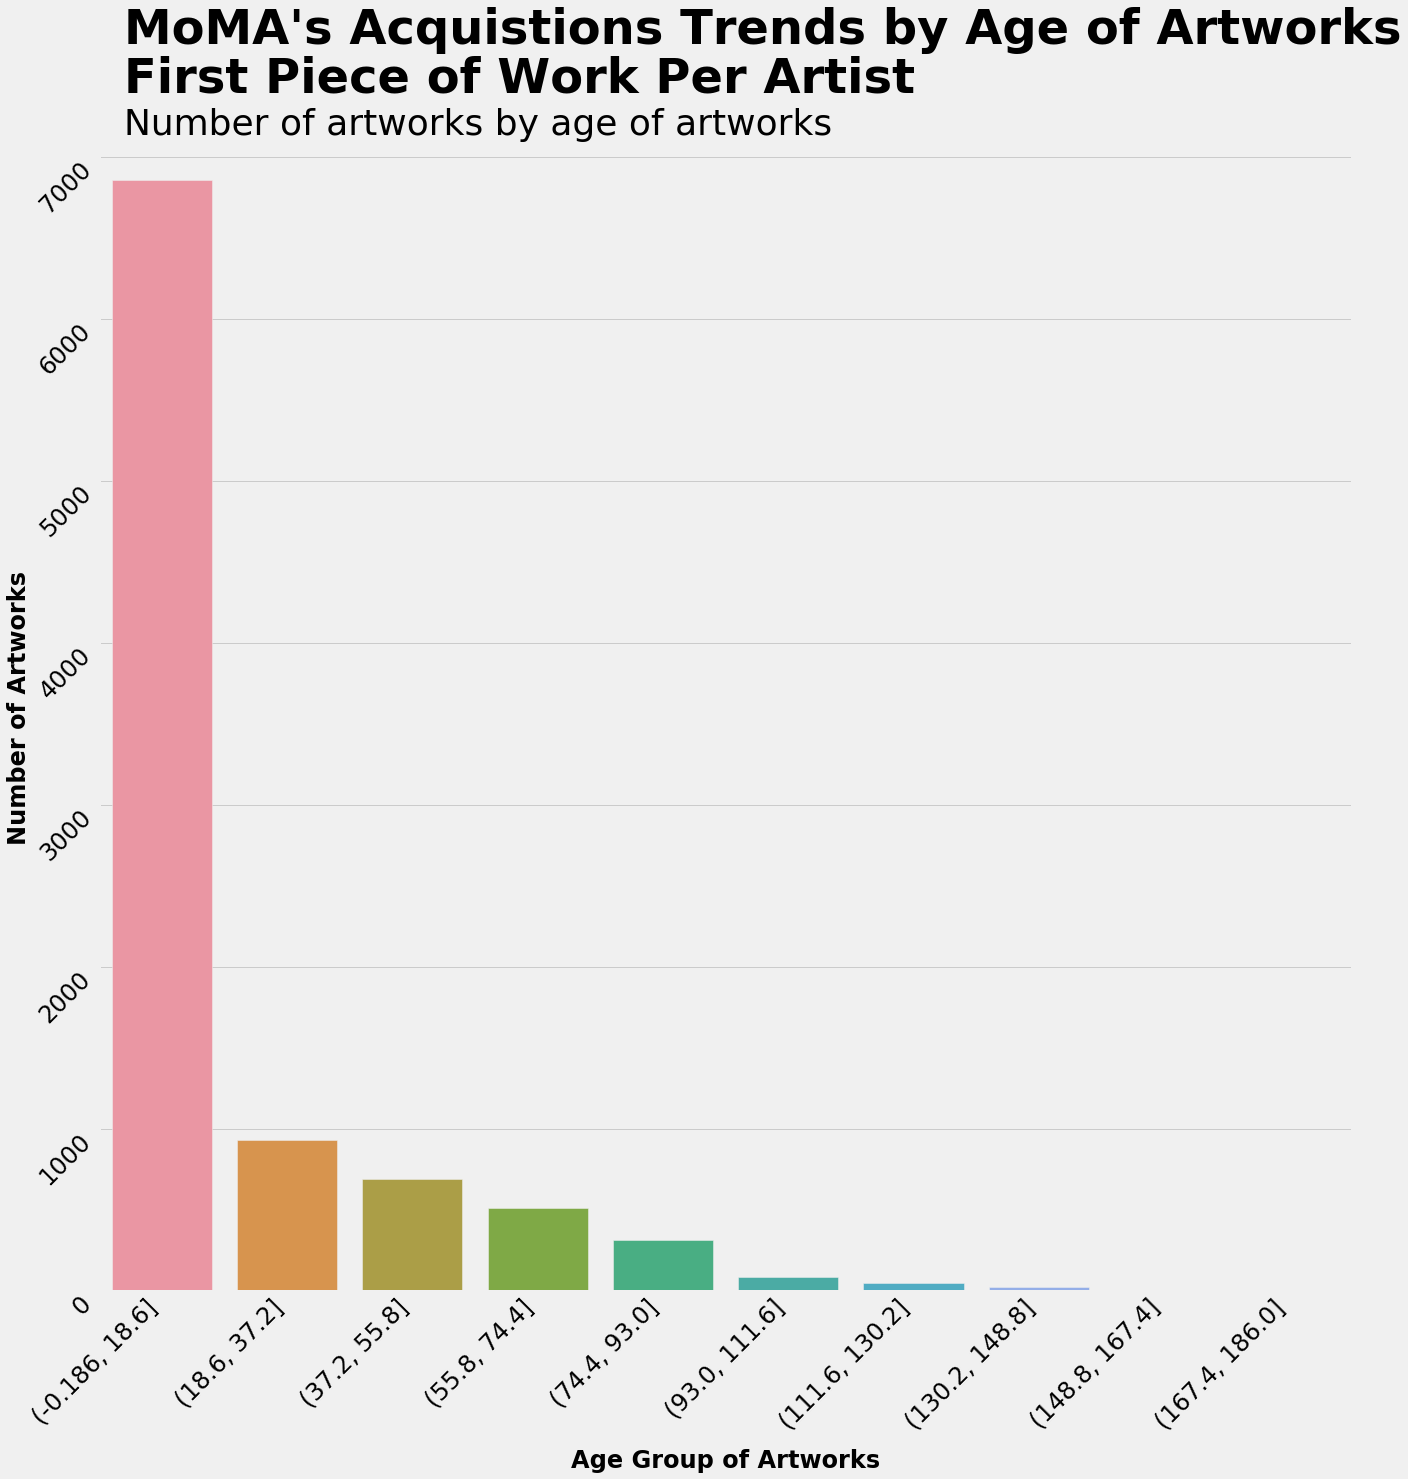

In [79]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

acquired_age_artwork_bins_2 = pd.cut(master_copy_3['minValues_AcquiredAge_Artwork_2'], 10)
chart_acquiredage_artwork_2 = sns.countplot(
    data=master_copy,
    x=acquired_age_artwork_bins_2,
)

# set title and subtitle
chart_acquiredage_artwork_2.text(x=-0.3, y=7700, s="MoMA's Acquistions Trends by Age of Artworks", fontweight='bold', fontsize='48')
chart_acquiredage_artwork_2.text(x=-0.3, y=7400, s="First Piece of Work Per Artist", fontweight='bold', fontsize='48')
chart_acquiredage_artwork_2.text(x=-0.3, y=7140, s="Number of artworks by age of artworks", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Age Group of Artworks', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)

# The Bootstrap

## Population 

In [80]:
minValues_AcquiredAge_Artwork_2 = minValues_AcquiredAge_Artwork_2.dropna()
population = minValues_AcquiredAge_Artwork_2.to_frame().reset_index()
population.head(5)

#population.columns

population.rename(columns={0:'PopulationAge'}, inplace = True)
population


,Artist,PopulationAge
0,A. Becker,10.0
1,A. E. Gallatin,59.0
2,A. F. Gangkofner,2.0
3,A. G. Fronzoni,0.0
4,A. Gisiger,0.0
5,A. Gromov,72.0
6,A. K. Barutchev,71.0
7,A. Karra,70.0
8,A. Lawrence Kocher,70.0
9,A. M. Cassandre,0.0


In [81]:
population_observed_mean = np.average(population['PopulationAge'])
population_observed_mean

16.418101172246278

In [82]:
population.describe()

,PopulationAge
count,9469.000000
mean,16.418101
std,26.047022
min,0.000000
25%,1.000000
50%,3.000000
75%,24.000000
max,186.000000


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text yticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

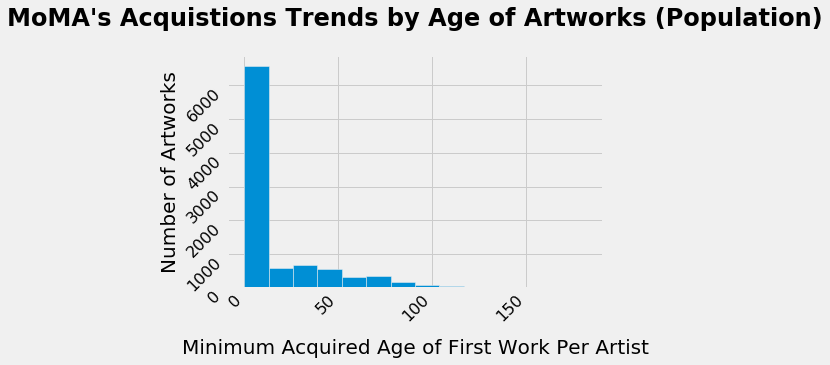

In [83]:
#Histogram of your population
plt.figure(figsize=(20,20))
population.hist(bins=np.arange(0, 186, 13))

# set title and subtitle
plt.title(x=0.5, y=1.1,label="MoMA's Acquistions Trends by Age of Artworks (Population)", fontweight='bold', fontsize='24')

plt.ylabel(ylabel='Number of Artworks', fontsize=20, fontweight='medium')
plt.xlabel(xlabel='Minimum Acquired Age of First Work Per Artist', fontsize=20, fontweight='medium', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='16'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='16'  
)

In [84]:
population['PopulationAge'] = population['PopulationAge'].astype(int)
population['Artist'] = population['Artist'].astype(str)


## Standard error the mean given sample size = 9469

#### It can be seen from the formula that the standard error of the mean decreases as N increases. This is expected because if the mean at each step is calculated using many data points, then a small deviation in one value will cause less effect on the final mean. 

#### The standard error of the mean tells us how the mean varies with different experiments measuring the same quantity. Thus if the effect of random changes are significant, then the standard error of the mean will be higher. If there is no change in the data points as experiments are repeated, then the standard error of mean is zero. 

In [85]:
from math import sqrt
# standard error of the mean
# standard deviation of the observed / sqrt(sample size)
np.std(population['PopulationAge']) / (sqrt(9469))

0.2676597641860606

## Simulate SAME random sample size of 9469 times with Replacement

## Simulated average of acquired age of artwork 

In [86]:
avg = []
n = 9469
simulations = 9469
for i in np.arange(simulations): 
    sample = np.random.choice(minValues_AcquiredAge_Artwork_2, n, replace=True)
    avg = np.append(avg,np.average(sample))
avg

array([16.32263175, 16.41535537, 16.7920583 , ..., 16.4294012 ,
       16.54461928, 16.59953533])

In [87]:
sample_avg_pd = pd.DataFrame(avg)

In [88]:
sample_avg_pd.describe()

,0
count,9469.000000
mean,16.425003
std,0.270116
min,15.488647
25%,16.239941
50%,16.425283
75%,16.606505
max,17.328335


In [89]:
sum(avg)

155528.3574823107

In [90]:
sample_avg = np.average(avg)
sample_avg

16.425003430384482

In [91]:
sample_avg_pd.describe()

,0
count,9469.000000
mean,16.425003
std,0.270116
min,15.488647
25%,16.239941
50%,16.425283
75%,16.606505
max,17.328335


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text yticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

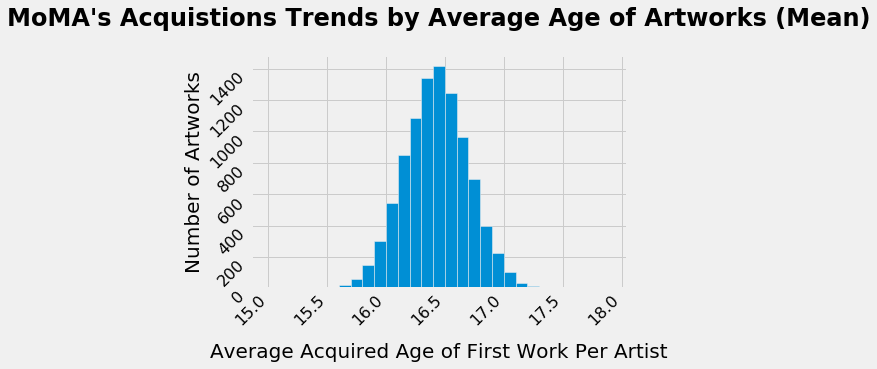

In [92]:
#Histogram of your sampled means
plt.figure(figsize=(20,20))
sample_avg_pd.hist(bins=np.arange(15, 18, .1))

# set title and subtitle
plt.title(x=0.5, y=1.1,label="MoMA's Acquistions Trends by Average Age of Artworks (Mean)", fontweight='bold', fontsize='24')

plt.ylabel(ylabel='Number of Artworks', fontsize=20, fontweight='medium')
plt.xlabel(xlabel='Average Acquired Age of First Work Per Artist', fontsize=20, fontweight='medium', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='16'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='16'  
)

## Deviation of the simulated avg from the observed mean 

In [93]:
avg2 = []
n = 9469
simulations = 10000
for i in np.arange(simulations): 
    sample2 = np.random.choice(minValues_AcquiredAge_Artwork_2, n, replace=True)
    avg2 = np.append(avg2,population_observed_mean-np.average(sample2))
avg2

array([-0.13063681, -0.02872531,  0.0149963 , ..., -0.01742528,
       -0.21184919,  0.13264336])

In [94]:
avg2_pd = pd.DataFrame(avg2)

In [95]:
avg2_pd.describe()

,0
count,10000.000000
mean,-0.000107
std,0.265883
min,-1.001901
25%,-0.178609
50%,-0.001162
75%,0.183124
max,0.904319


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text yticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

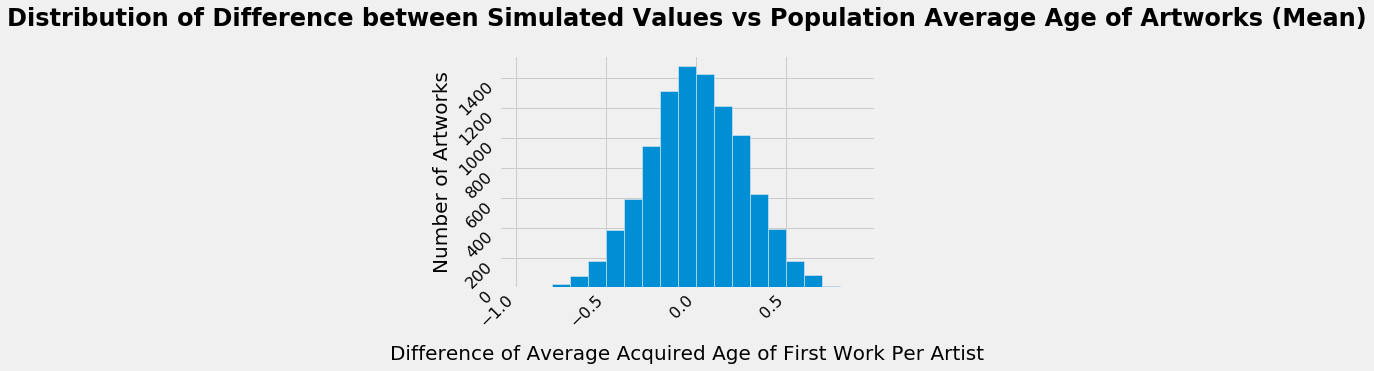

In [96]:
#Histogram of difference btwn simulated vs population avg
plt.figure(figsize=(20,20))
avg2_pd.hist(bins=np.arange(-1, 1, .1))

# set title and subtitle
plt.title(x=0.5, y=1.1,label="Distribution of Difference between Simulated Values vs Population Average Age of Artworks (Mean)", fontweight='bold', fontsize='24')

plt.ylabel(ylabel='Number of Artworks', fontsize=20, fontweight='medium')
plt.xlabel(xlabel='Difference of Average Acquired Age of First Work Per Artist', fontsize=20, fontweight='medium', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='16'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='16'  
)

In [97]:
# calculate the z-score
# using the z-score because sample size is larger than 30 
# and know standard deviation of population
# difference of sampled mean from population mean / (standard deviation of population/sqrt(sample size))

z_score = (avg2_pd) /((np.std(population['PopulationAge']))/sqrt(n))
z_score

,0
0,-0.488070
1,-0.107320
2,0.056027
3,0.608017
4,0.730725
5,0.821473
6,0.154273
7,-0.631296
8,-0.380356
9,0.840412


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

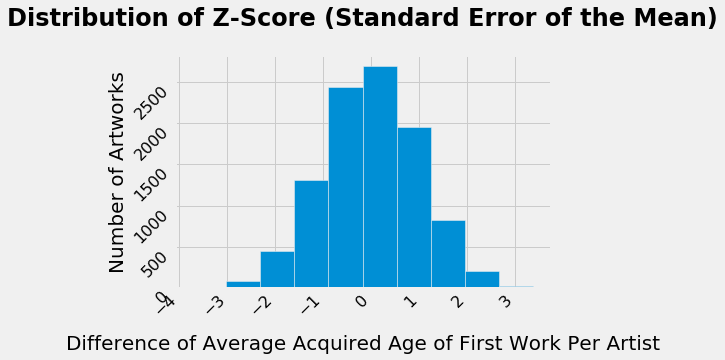

In [98]:
#Histogram of your sample minimums
plt.figure(figsize=(20,20))
z_score.hist()

# set title and subtitle
plt.title(x=0.5, y=1.1,label="Distribution of Z-Score (Standard Error of the Mean)", fontweight='bold', fontsize='24')

plt.ylabel(ylabel='Number of Artworks', fontsize=20, fontweight='medium')
plt.xlabel(xlabel='Difference of Average Acquired Age of First Work Per Artist', fontsize=20, fontweight='medium', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='16'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='16'  
)





### When you have multiple samples and want to describe the standard deviation of those sample means (the standard error), you use this z-score.

### This z-score will tell you how many standard errors there are between the sample mean and the population mean.

### z = (x – μ) / (σ / √n)

### Since the z-score is on a normal distribution curve, we can use it to compute the probability of finding each sampled mean or the average acquired age. The z-score shows the sampling distribution of means as the standard error. For example, 99% vs 95% vs 68%/ of values fall within 3 vs 2 vs 1 standard deviations from the mean in a normal probability distribution.

In [99]:
diff_lower_bound = np.percentile(avg,2.5)
diff_upper_bound = np.percentile(avg,97.5)
print("Bootstrapped 95% confidence interval for Average Acquired Age of First Work Per Artist[{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Average Acquired Age of First Work Per Artist[15.898078, 16.956521]


In [100]:
p_value = np.count_nonzero(avg < population_observed_mean)/10000
p_value

0.4635

# Simulate minimum 10k times, same sample size with replacement

In [101]:
minimum = []
for i in np.arange(10000): 
    minimum = np.random.choice(minValues_AcquiredAge_Artwork_2, size = 9468, replace=True)
    minimum = np.append(minimum,min(minimum))
minimum

array([ 0.,  1., 48., ...,  0., 10.,  0.])

In [102]:
representative_sample_3_mean = np.average(minimum)
representative_sample_3_mean

16.565635230752985

In [103]:
minimum_pd = pd.DataFrame(minimum)

In [104]:
minimum_pd.describe()

,0
count,9469.000000
mean,16.565635
std,26.518263
min,0.000000
25%,1.000000
50%,3.000000
75%,24.000000
max,186.000000


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text yticklabel objects>)

<Figure size 1440x1440 with 0 Axes>

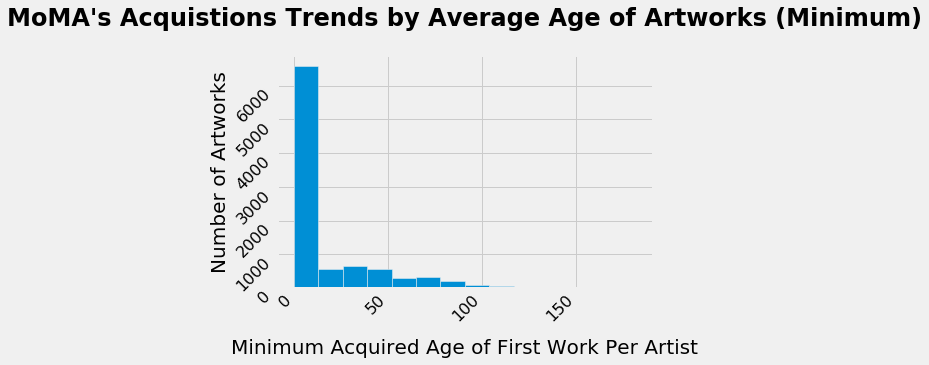

In [105]:
#Histogram of your sample minimums
plt.figure(figsize=(20,20))
minimum_pd.hist(bins=np.arange(0, 186, 13))

# set title and subtitle
plt.title(x=0.5, y=1.1,label="MoMA's Acquistions Trends by Average Age of Artworks (Minimum)", fontweight='bold', fontsize='24')

plt.ylabel(ylabel='Number of Artworks', fontsize=20, fontweight='medium')
plt.xlabel(xlabel='Minimum Acquired Age of First Work Per Artist', fontsize=20, fontweight='medium', labelpad=15)

plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='16'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='16'  
)

### Using bootstrap is not a great estimation method for estimating the acquired age of artworks because:
#### - there are rare elements around the min and max value of the population
#### - majority of count of artworks are in the range of [0,20] years of age yet there is a long tail of data in the range of dataset is [20,186]
#### - probability distribution of the statistic is not roughly bell shaped (the shape of the empirical distribution will be a clue) 

# The Hypothesis Test

# Nationality 

In [106]:
# nationality

master_copy['Nationality'].value_counts(dropna=False).head(500)

American               46869
French                 19680
German                  7536
British                 4769
NaN                     2511
Italian                 2418
Japanese                2031
Spanish                 2022
Swiss                   1813
Russian                 1566
Dutch                   1367
Belgian                 1249
Mexican                 1042
Nationality unknown      794
Canadian                 766
Brazilian                719
Colombian                712
Czech                    641
Austrian                 612
Argentine                572
Chilean                  546
Ivorian                  480
Polish                   474
Venezuelan               419
Danish                   381
Israeli                  335
South African            327
Australian               250
Chinese                  240
Swedish                  215
                       ...  
Czechoslovakian            4
Slovak                     4
Ghanaian                   3
Serbian       

In [107]:
master_copy['Nationality'].describe()

count       103479
unique         116
top       American
freq         46869
Name: Nationality, dtype: object

In [108]:
master_copy['Nationality_Am'] = master_copy['Nationality'].str.contains('Amer' or 'American')
master_copy['Nationality_Am']

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27          NaN
28          NaN
29          NaN
          ...  
105960    False
105961    False
105962    False
105963    False
105964    False
105965    False
105966    False
105967     True
105968    False
105969    False
105970    False
105971    False
105972     True
105973     True
105974    False
105975    False
105976     True
105977     True
105978     True
105979    False
105980    False
105981    False
105982     True
105983     True
105984    False
105985     True
105986    False
105987     True
105988     True
105989    False
Name: Nationality_Am, Le

In [109]:
master_copy['Nationality_Am'] = master_copy['Nationality_Am'].replace({True:'American', False:'International'})

In [110]:
master_copy['Nationality_Am']

0         International
1         International
2         International
3         International
4         International
5         International
6         International
7         International
8         International
9         International
10        International
11        International
12        International
13        International
14        International
15        International
16        International
17        International
18        International
19        International
20        International
21        International
22        International
23        International
24        International
25        International
26        International
27                  NaN
28                  NaN
29                  NaN
              ...      
105960    International
105961    International
105962    International
105963    International
105964    International
105965    International
105966    International
105967         American
105968    International
105969    International
105970    Intern

In [111]:
master_copy['Nationality_Am'].value_counts(dropna=True).head(20)

International    56598
American         46881
Name: Nationality_Am, dtype: int64

In [112]:
master_copy['Nationality_Am'].describe()

count            103479
unique                2
top       International
freq              56598
Name: Nationality_Am, dtype: object

In [113]:
Percentage_American = str((46881/103479)*100)
Percentage_International = str(100-((46881/103479)*100))

print('Percentage of American Artist in MoMA Collection :' + (Percentage_American))
print('Percentage of International Artist in MoMA Collection :' + (Percentage_International))

Percentage of American Artist in MoMA Collection :45.304844461195025
Percentage of International Artist in MoMA Collection :54.695155538804975


In [114]:
master_copy.head(5)

,UniqueID,Title,Artist,Gender,Nationality,Birth,Death,Date,Medium,Dimensions,...,67,68,69,70,71,72,73,74,minValues_AcquiredAge_Artwork_2,Nationality_Am
0,6210,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,Male,Austrian,1841.0,1918.0,1896.0,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,International
1,6210,Armchair,Otto Wagner,Male,Austrian,1841.0,1918.0,1902.0,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,International
2,6210,Stool,Otto Wagner,Male,Austrian,1841.0,1918.0,1904.0,"Bent beech wood, molded plywood, and aluminum","18 1/2 x 16 x 16"" (47 x 40.6 x 40.6 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,International
3,6210,Railing,Otto Wagner,Male,Austrian,1841.0,1918.0,1899.0,Painted cast-iron,"28 1/4 x 46 1/2 x 3"" (72.4 x 117.5 x 7.6 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,International
4,7470,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,Male,French,1944.0,0.0,1987.0,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,International


## Simulate null hypothesis 50%-50% between American vs International Artists 

In [115]:
def simulate():
    share = [0.5, 0.5]
    return sample_proportions (1000,share)

simulate()

array([0.499, 0.501])

In [116]:
test_statistics_under_null_am = make_array()
repetitions = 10000

for i in np.arange(repetitions):
    test_statistics_under_null_am = np.append(test_statistics_under_null_am, simulate().item(0))

test_statistics_under_null_am

array([0.52 , 0.513, 0.492, ..., 0.506, 0.488, 0.517])

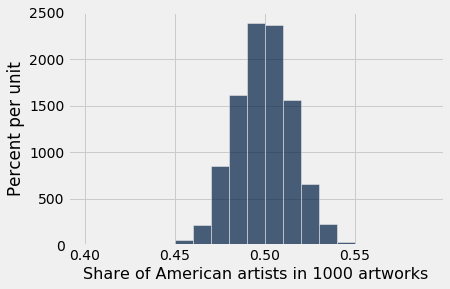

In [117]:
Table().with_column('Share of American artists in 1000 artworks', test_statistics_under_null_am).hist(bins=np.arange(0.4,0.6,0.01))

In [118]:
p_value = np.count_nonzero(test_statistics_under_null_am < .453)/ len(test_statistics_under_null_am)
p_value

# Null: MoMA is evenly made up of American and international artists.
# Alternative: MoMA is NOT evenly made up of American and international artists.

# P-value is the chance that under the null hypotheis, 
# that the test statistic is equal to the value observed in the data. A large p-value (> 0.05) 
# indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
# A smaller p-value (< 0.05) indicates strong evidence against the null hypothesis, so you reject
# the null hypothesis and accept the alternative.

0.0013

In [119]:
diff_lower_bound = percentile(2.5, test_statistics_under_null_am)
diff_upper_bound = percentile(97.5, test_statistics_under_null_am)
print("Bootstrapped 95% confidence interval for Share of American artists in 1000 artworks: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Share of American artists in 1000 artworks: [0.470000, 0.531000]


### It turns out the p-value at 0.0013 is much smaller than the cutoff of 0.05. It indicates strong evidence against the null hypothesis and thus, rejection of the null hypothesis. Thus, I reject the null hypothesis that American and international artists have equal representation in MoMA’s art collection. I accept the alternative hypothesis which is the proportion of American and international artists are not evenly split 50-50. 

## By how much is the lead of American or international artists over the other group? 
## How likely is the lead of one group in the simulated samples?

In [120]:
test_statistics_under_null_in = make_array()
repetitions = 10000

for i in np.arange(repetitions):
    test_statistics_under_null_in = np.append(test_statistics_under_null_in, simulate().item(1))

test_statistics_under_null_in

array([0.519, 0.493, 0.527, ..., 0.525, 0.506, 0.497])

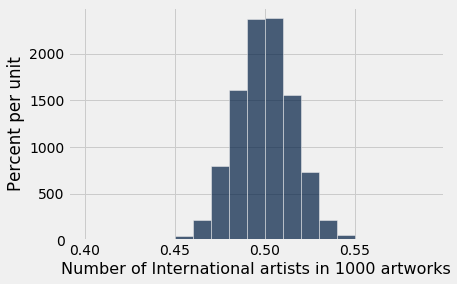

In [121]:
Table().with_column(
'Number of International artists in 1000 artworks', test_statistics_under_null_in).hist(bins=np.arange(.4,.6,.01))

In [122]:
def difference():
    difference = test_statistics_under_null_in - test_statistics_under_null_am
    return difference

sampled_difference = difference()

In [123]:
diff_lower_bound = percentile(2.5, sampled_difference)
diff_upper_bound = percentile(97.5, sampled_difference)
print("Bootstrapped 95% confidence interval for size of International artist's lead over American artists: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for size of International artist's lead over American artists: [-0.043000, 0.043000]


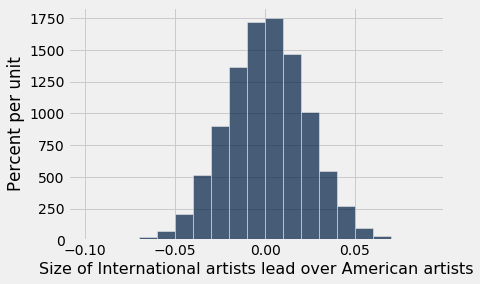

In [124]:
Table().with_column(
'Size of International artists lead over American artists', sampled_difference).hist(bins=np.arange(-0.1,.1,0.01))

In [125]:
probability_of_in_lead = (10000-sum(test_statistics_under_null_in))/10000

In [126]:
probability_of_in_lead

0.4997140999999997

In [127]:
probability_of_am_lead = (10000-sum(test_statistics_under_null_am))/10000

In [128]:
probability_of_am_lead

0.5001898000000002

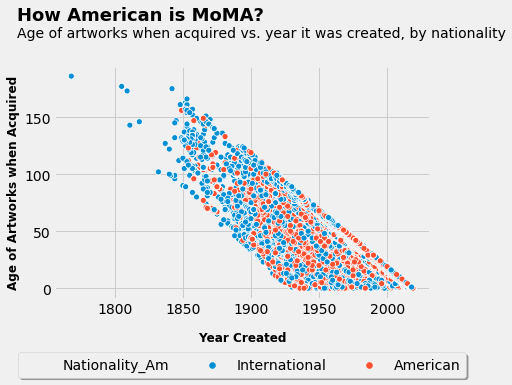

In [129]:
master_copy['Date'] = master_copy['Date'].astype(float)
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = sns.scatterplot(x="Date", y="AcquiredAge_Artwork_2", hue="Nationality_Am", data=master_copy)

# move legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax.text(x=1728, y=235, s="How American is MoMA?", fontweight='bold', fontsize='18')
ax.text(x=1728, y=220, s="Age of artworks when acquired vs. year it was created, by nationality", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Age of Artworks when Acquired', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)


plt.show()

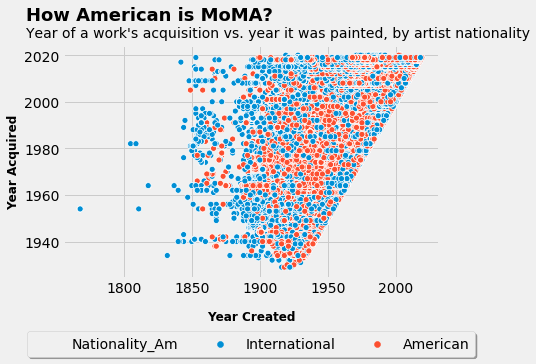

In [130]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax_dept_am = sns.scatterplot(x="Date", y="DateAcquired_Year", hue="Nationality_Am", data=master_copy)

# move legend
ax_dept_am.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

# set title and subtitle
ax_dept_am.text(x=1728, y=2035, s="How American is MoMA?", fontweight='bold', fontsize='18')
ax_dept_am.text(x=1728, y=2028, s="Year of a work's acquisition vs. year it was painted, by artist nationality", fontsize='14')

# set axis labels
plt.ylabel(ylabel='Year Acquired', fontsize=12, fontweight='bold')
plt.xlabel(xlabel='Year Created', fontsize=12, fontweight='bold', labelpad=15)


plt.show()

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text yticklabel objects>)

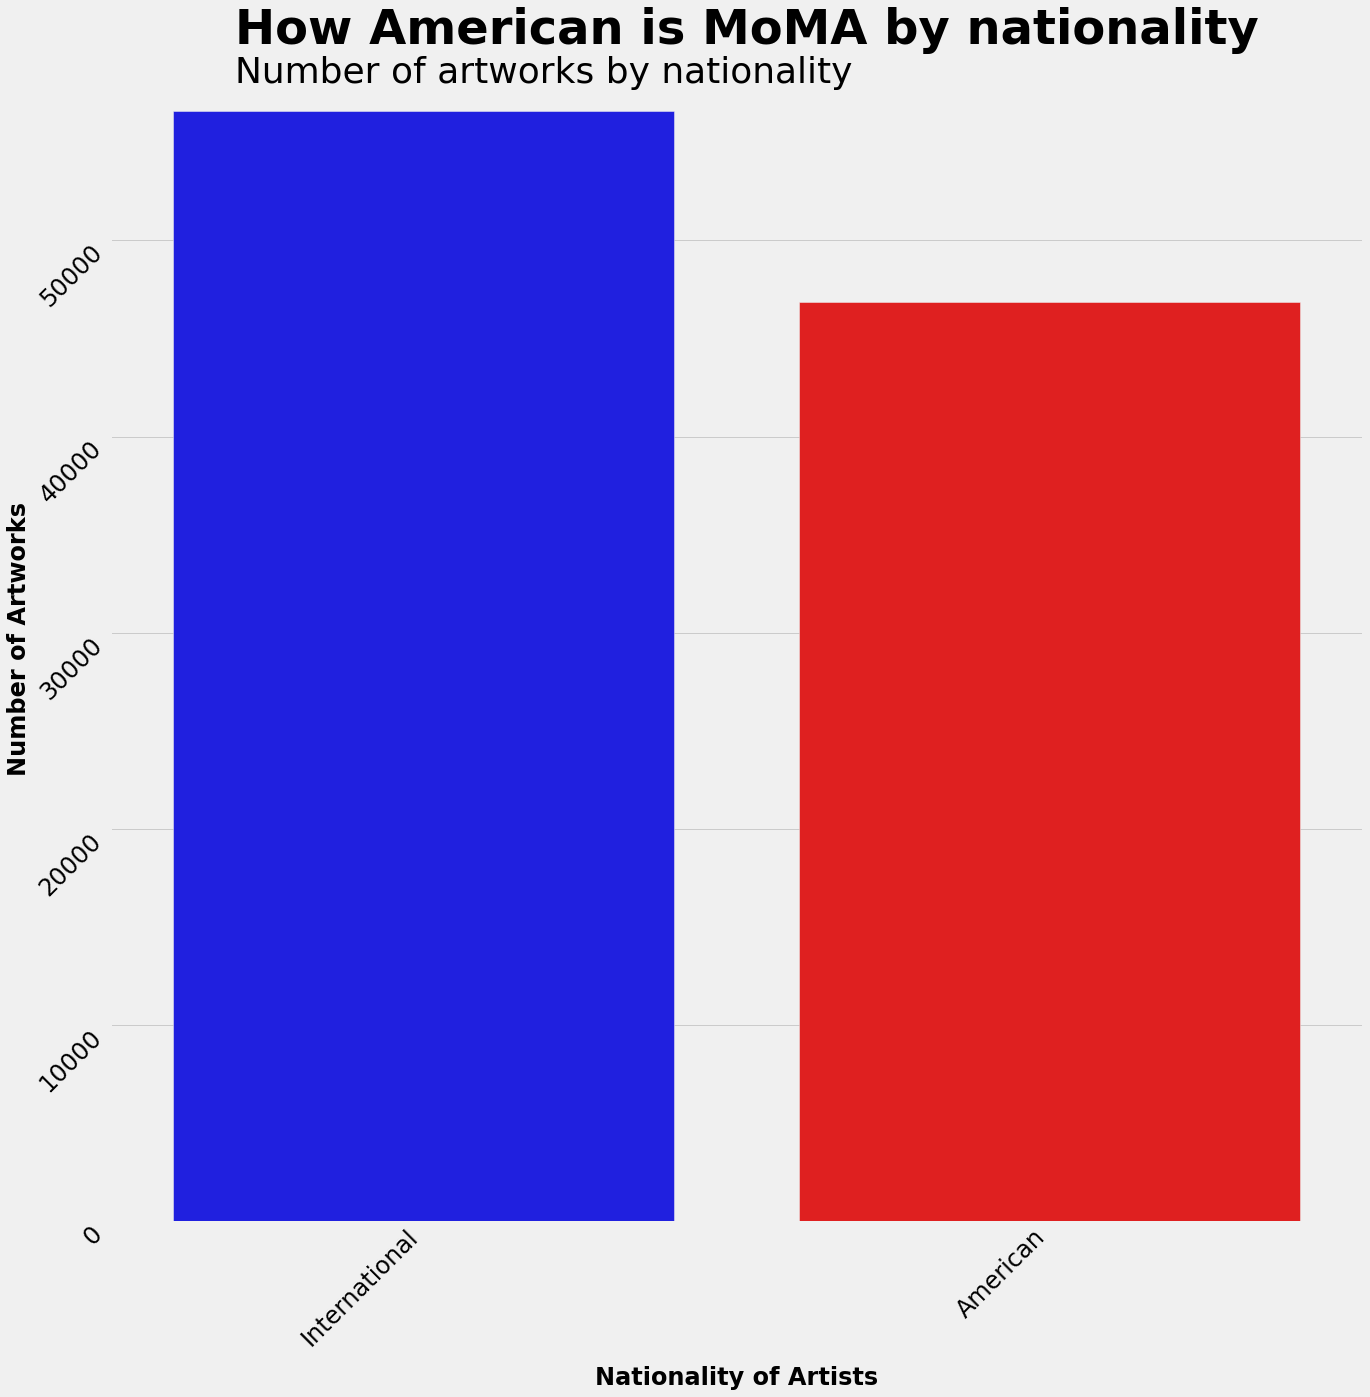

In [131]:
plt.figure(figsize=(20,20))
#plt.style.use('seaborn-colorblind')

nationality = sns.countplot(
    data=master_copy,
    palette=["blue","red"],
    x='Nationality_Am',
)

# set title and subtitle
nationality.text(x=-0.3, y=60000, s="How American is MoMA by nationality", fontweight='bold', fontsize='48')
nationality.text(x=-0.3, y=58000, s="Number of artworks by nationality", fontsize='36')

# set axis labels
plt.ylabel(ylabel='Number of Artworks', fontsize=24, fontweight='bold')
plt.xlabel(xlabel='Nationality of Artists', fontsize=24, fontweight='bold', labelpad=15)
    
plt.xticks(rotation=45, horizontalalignment='right', fontweight='medium', fontsize='24'  
)

plt.yticks(
    rotation=45, 
    verticalalignment='top',
    fontweight='medium',
    fontsize='24'  
)